In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')



1. Show the first 10 entries

In [4]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


2. What is the number of observations in the dataset?

In [9]:
df.shape[0]

4622

3. What is the number of columns in the dataset?

In [8]:
df.shape[1]

5

4. Which was the most-ordered item and how many times it was ordered?

In [39]:
af = df.loc[:,['quantity', 'item_name']].groupby(['item_name']).sum()
af.idxmax()[0]

'Chicken Bowl'

In [38]:
af.loc[af.idxmax()[0]][0]

761

5. How many different items are sold?

In [19]:
df.item_name.unique().size

50

6. How many items were orderd in total?

In [20]:
df['quantity'].sum()

4972

7. Turn the item price into a float

8. What is the price of each item?

In [ ]:
df['item_price_float']= df['item_price'].apply(lambda x: float(x[1:]))
df['item_price']

In [27]:
df.drop_duplicates(subset=['item_name', 'choice_description']).tail(10)

,order_id,quantity,item_name,choice_description,item_price
4592,1825,1,Barbacoa Burrito,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",11.75
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75
4594,1825,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Pinto Beans, Sour ...",11.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25


9. How much was the revenue for the period in the dataset?

In [29]:
df['item_price'].sum()

34500.16

10. How many orders were made in the period?

In [30]:
df.order_id.unique().size

1834

11. What is the average revenue amount per order? 

In [31]:
df['item_price'].sum()/df.order_id.unique().size

18.811428571428575

12. Merge the table dfa that contains order date and order id with df and plot daily revenue 

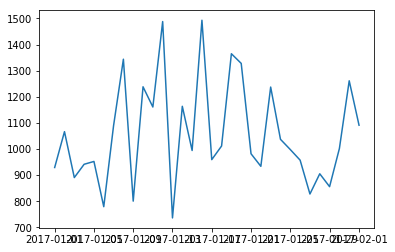

In [55]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
df1 = pd.merge(df, dfa).groupby('date').apply(lambda x: sum(x.item_price))
plt.plot(df1)
plt.show()

13. Create a histogram of the top 5 items bought

In [16]:

df2 = df.groupby('item_name').sum()
df2 = df2.sort_values(by='quantity', ascending=False)
df2.head(5)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


14. Sort the dataset by the name of the item

In [68]:
df = df.sort_values(by='item_name')
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49


15. How many times were a Veggie Salad Bowl ordered?

In [70]:
df[df['item_name'] == 'Veggie Salad Bowl'].count()[0]

18

16. How many times people orderd more than one Canned Soda?

In [71]:
(df[(df['item_name'] == 'Canned Soda') & (df['quantity'] > 1)]).shape[0]

20

17. Create a scatterplot with the number of items orderered per order price

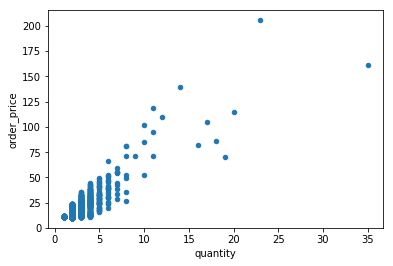

In [73]:
pl = df.groupby('order_id').sum()
pl = pl.rename(columns={'item_price': 'order_price'})
ax1 = pl.plot.scatter(x='quantity', y='order_price')